In [4]:
from output_sh import *
import os 
from collections import Counter
import matplotlib.pyplot as plt

path = os.listdir("./")
path

ModuleNotFoundError: No module named 'output_sh'

In [75]:
# GPT 3.5 turbo

In [3]:
di_gpt35t = Output("./Direct_LogiQA2_test_gpt-3.5-turbo.json")
cot_gpt35t = Output("./CoT_LogiQA2_test_gpt-3.5-turbo.json")
lot_gpt35t = Output("./lotcot_gpt-3.5-turbo_logiqa2_05-18_00-03-02.json")

NameError: name 'Output' is not defined

In [77]:
all_fail = sorted(list(di_gpt35t.fail_ids & cot_gpt35t.fail_ids & lot_gpt35t.fail_ids))
di_fail = sorted(list(di_gpt35t.fail_ids & cot_gpt35t.good_ids & lot_gpt35t.good_ids))
cot_fail = sorted(list(cot_gpt35t.fail_ids & di_gpt35t.good_ids & lot_gpt35t.good_ids))
lot_fail = sorted(list(lot_gpt35t.fail_ids & di_gpt35t.good_ids & cot_gpt35t.good_ids))

In [78]:
len(all_fail)

503

In [79]:
len(di_fail), len(cot_fail), len(lot_fail)

(557, 177, 352)

In [80]:
# all

In [81]:
all_fail_list = di_gpt35t.pick(all_fail)

In [82]:
all_f_res_types = [res_type for ith in all_fail_list for res_type in ith["reasoning_type"]]
all_f_res_types

['Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional R

In [2]:
res_types_stat = Counter(all_f_res_types)
res_types_stat

NameError: name 'Counter' is not defined

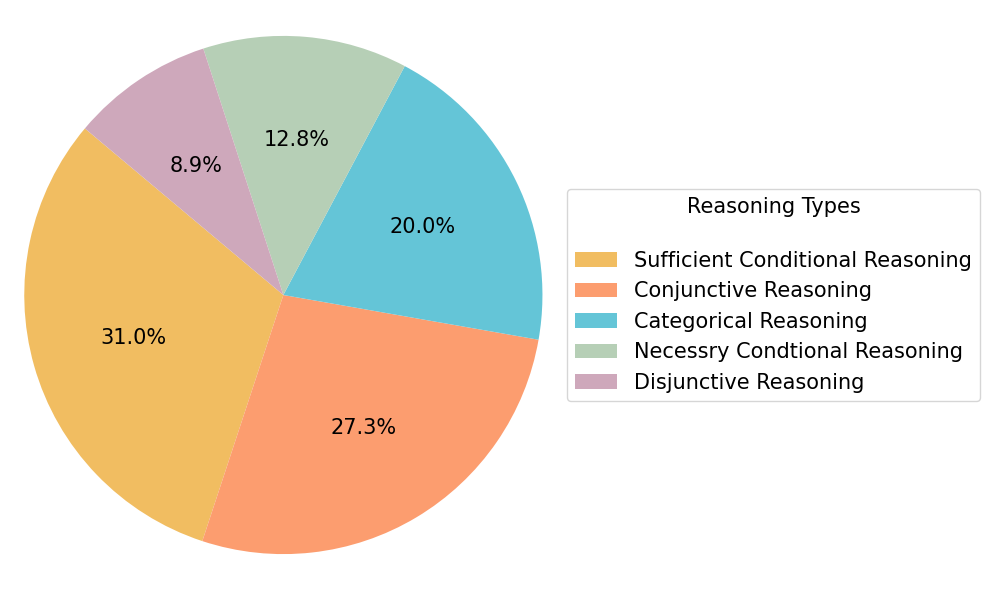

In [84]:
fixed_order = [
    'Sufficient Conditional Reasoning',
    'Conjunctive Reasoning',
    'Categorical Reasoning',
    'Necessry Condtional Reasoning',
    'Disjunctive Reasoning'
]

labels = fixed_order
sizes  = [res_types_stat.get(lbl, 0) for lbl in labels]

color_map = {
    'Sufficient Conditional Reasoning': (241/255, 189/255, 97/255),   # yellow
    'Conjunctive Reasoning':           (252/255, 157/255, 111/255),  # orange
    'Categorical Reasoning':           (100/255, 197/255, 215/255),  # blue
    'Necessry Condtional Reasoning':   (182/255, 207/255, 182/255),  # green
    'Disjunctive Reasoning':           (206/255, 168/255, 187/255)   # purple
}

colors = [color_map[label] for label in labels]

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=['']*len(labels),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 15},
    pctdistance=0.6,
    labeldistance=1.1
)

handles = [wedges[labels.index(lbl)] for lbl in fixed_order]

plt.legend(
    wedges,
    fixed_order,
    title='Reasoning Types\n',
    title_fontsize=15,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    prop={'size': 15}
)

plt.axis('equal')
plt.tight_layout()
plt.savefig('failed_all.pdf')
plt.show()

In [85]:
# direct only

In [86]:
di_fail_list = di_gpt35t.pick(di_fail)

In [87]:
di_f_res_types = [res_type for ith in di_fail_list for res_type in ith["reasoning_type"]]
di_f_res_types

['Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',


In [88]:
res_types_stat = Counter(di_f_res_types)
res_types_stat

Counter({'Sufficient Conditional Reasoning': 517,
         'Conjunctive Reasoning': 479,
         'Categorical Reasoning': 314,
         'Necessry Condtional Reasoning': 206,
         'Disjunctive Reasoning': 148})

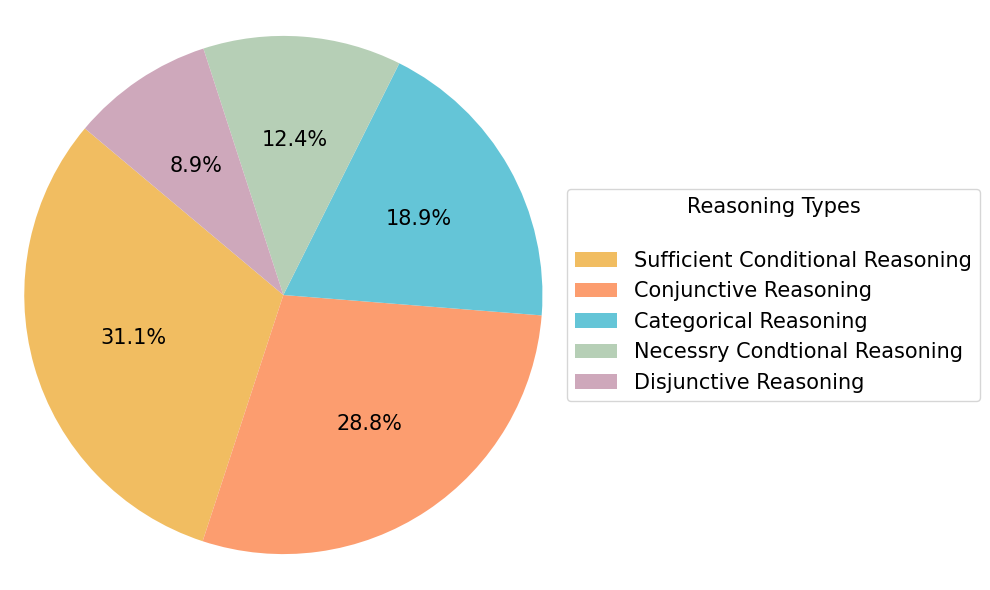

In [89]:
fixed_order = [
    'Sufficient Conditional Reasoning',
    'Conjunctive Reasoning',
    'Categorical Reasoning',
    'Necessry Condtional Reasoning',
    'Disjunctive Reasoning'
]

labels = fixed_order
sizes  = [res_types_stat.get(lbl, 0) for lbl in labels]

color_map = {
    'Sufficient Conditional Reasoning': (241/255, 189/255, 97/255),   # yellow
    'Conjunctive Reasoning':           (252/255, 157/255, 111/255),  # orange
    'Categorical Reasoning':           (100/255, 197/255, 215/255),  # blue
    'Necessry Condtional Reasoning':   (182/255, 207/255, 182/255),  # green
    'Disjunctive Reasoning':           (206/255, 168/255, 187/255)   # purple
}

colors = [color_map[label] for label in labels]

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=['']*len(labels),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 15},
    pctdistance=0.6,
    labeldistance=1.1
)

handles = [wedges[labels.index(lbl)] for lbl in fixed_order]

plt.legend(
    wedges,
    fixed_order,
    title='Reasoning Types\n',
    title_fontsize=15,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    prop={'size': 15}
)

plt.axis('equal')
plt.tight_layout()
plt.savefig('failed_dir.pdf')
plt.show()

In [90]:
# CoT only

In [1]:
cot_fail_list = cot_gpt35t.pick(cot_fail)

NameError: name 'cot_gpt35t' is not defined

In [92]:
cot_f_res_types = [res_type for ith in cot_fail_list for res_type in ith["reasoning_type"]]
cot_f_res_types

['Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional R

In [93]:
res_types_stat = Counter(cot_f_res_types)
res_types_stat

Counter({'Sufficient Conditional Reasoning': 165,
         'Conjunctive Reasoning': 152,
         'Categorical Reasoning': 104,
         'Necessry Condtional Reasoning': 63,
         'Disjunctive Reasoning': 40})

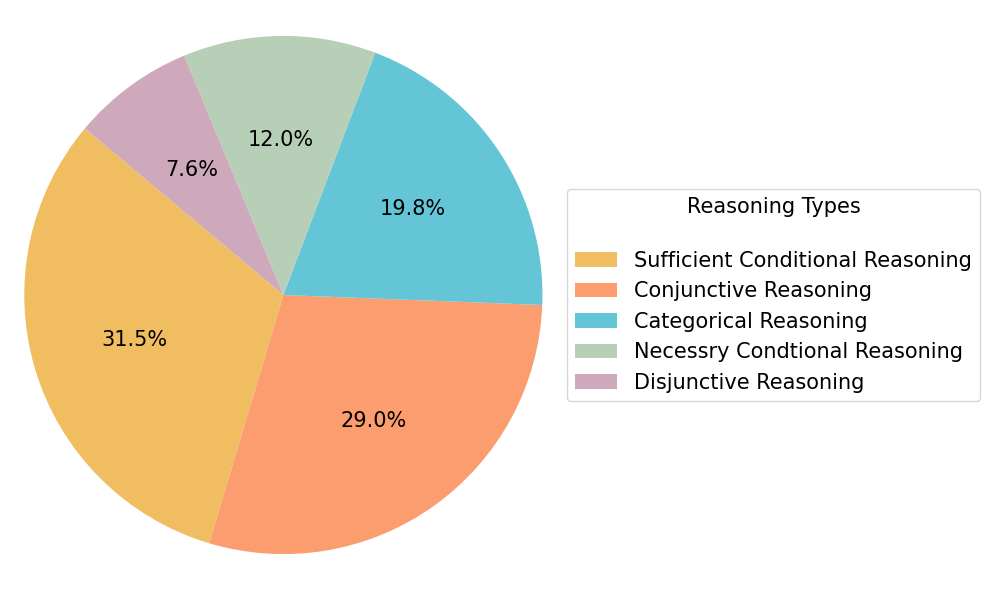

In [94]:
fixed_order = [
    'Sufficient Conditional Reasoning',
    'Conjunctive Reasoning',
    'Categorical Reasoning',
    'Necessry Condtional Reasoning',
    'Disjunctive Reasoning'
]

labels = fixed_order
sizes  = [res_types_stat.get(lbl, 0) for lbl in labels]

color_map = {
    'Sufficient Conditional Reasoning': (241/255, 189/255, 97/255),   # yellow
    'Conjunctive Reasoning':           (252/255, 157/255, 111/255),  # orange
    'Categorical Reasoning':           (100/255, 197/255, 215/255),  # blue
    'Necessry Condtional Reasoning':   (182/255, 207/255, 182/255),  # green
    'Disjunctive Reasoning':           (206/255, 168/255, 187/255)   # purple
}

colors = [color_map[label] for label in labels]

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=['']*len(labels),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 15},
    pctdistance=0.6,
    labeldistance=1.1
)

handles = [wedges[labels.index(lbl)] for lbl in fixed_order]

plt.legend(
    wedges,
    fixed_order,
    title='Reasoning Types\n',
    title_fontsize=15,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    prop={'size': 15}
)

plt.axis('equal')
plt.tight_layout()
plt.savefig('failed_cot.pdf')
plt.show()

In [95]:
# LoT only

In [96]:
lot_fail_list = lot_gpt35t.pick(lot_fail)

In [97]:
lot_f_res_types = [res_type for ith in lot_fail_list for res_type in ith["reasoning_type"]]
lot_f_res_types

['Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Conjunctive Reasoning',
 'Sufficient Conditional Reasoning',
 'Disjunctive Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',
 'Conjunctive Reasoning',
 'Categorical Reasoning',
 'Sufficient Conditional Reasoning',
 'Necessry Condtional Reasoning',


In [98]:
res_types_stat = Counter(lot_f_res_types)
res_types_stat

Counter({'Sufficient Conditional Reasoning': 332,
         'Conjunctive Reasoning': 285,
         'Categorical Reasoning': 227,
         'Necessry Condtional Reasoning': 173,
         'Disjunctive Reasoning': 95})

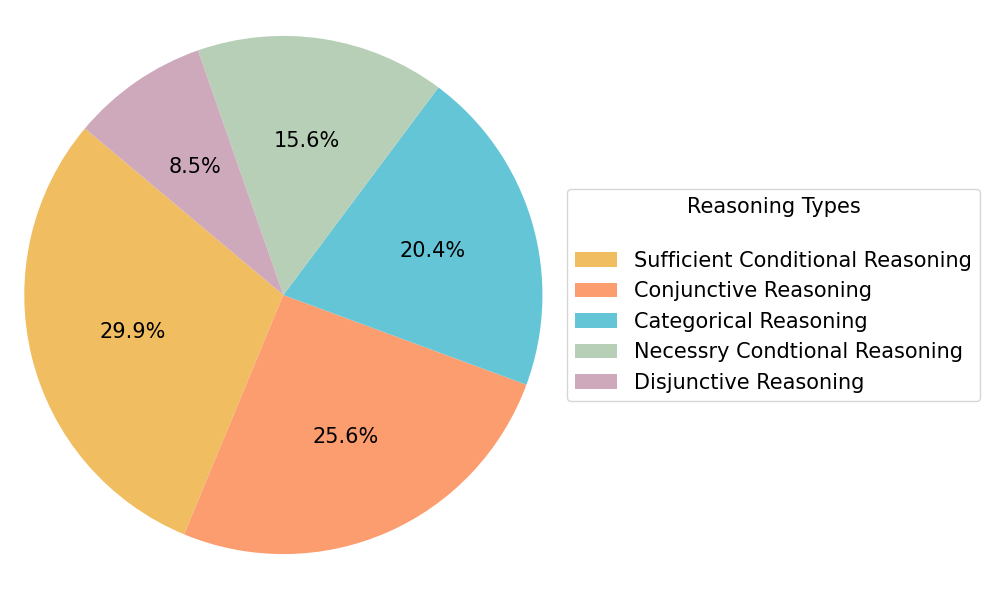

In [99]:
fixed_order = [
    'Sufficient Conditional Reasoning',
    'Conjunctive Reasoning',
    'Categorical Reasoning',
    'Necessry Condtional Reasoning',
    'Disjunctive Reasoning'
]

labels = fixed_order
sizes  = [res_types_stat.get(lbl, 0) for lbl in labels]

color_map = {
    'Sufficient Conditional Reasoning': (241/255, 189/255, 97/255),   # yellow
    'Conjunctive Reasoning':           (252/255, 157/255, 111/255),  # orange
    'Categorical Reasoning':           (100/255, 197/255, 215/255),  # blue
    'Necessry Condtional Reasoning':   (182/255, 207/255, 182/255),  # green
    'Disjunctive Reasoning':           (206/255, 168/255, 187/255)   # purple
}

colors = [color_map[label] for label in labels]

plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=['']*len(labels),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 15},
    pctdistance=0.6,
    labeldistance=1.1
)

handles = [wedges[labels.index(lbl)] for lbl in fixed_order]

plt.legend(
    wedges,
    fixed_order,
    title='Reasoning Types\n',
    title_fontsize=15,
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    prop={'size': 15}
)

plt.axis('equal')
plt.tight_layout()
plt.savefig('failed_lot.pdf')
plt.show()